# Streamlining the Customer Grievance Process
## Context:

As a data scientist working for the front office of a major American multinational bank, you are responsible for enhancing customer service and ensuring compliance with financial regulations. Your current assignment involves analysing the customer complaints the bank has received over the past year.

## Problems:

The current time-consuming manual process for daily triaging and reviewing of customer complaintsThe complaints data is currently underutilized in enhancing the quality of products and services.

## Objective: 

The goal is to use NLP techniques, such as text classification and sentiment analysis, to efficiently gain insights into the underlying causes of customer grievances. By leveraging these methods, we aim to better understand and address customer grievances, ultimately improving our grievance redressal process.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay

from tensorflow.keras.losses import SparseCategoricalCrossentropy

from transformers import TFDistilBertForSequenceClassification
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

plt.style.use('seaborn-v0_8')


2025-05-17 12:09:49.880339: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-17 12:09:49.889464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747501789.898840     560 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747501789.901486     560 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747501789.909497     560 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# !pip install vaderSentiment

In [3]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('vader_lexicon')

## Steps to be done: 

### Prepare text data using appropriate NLP techniques, such as text classification.

### Efficiently identify the primary factors behind customer grievances using sentiment analysis.

### Convert insights from sentiment analysis into actionable business strategies for Retail Banking.

## Data understanding:
### Read data in python environment.

### Check if the variables have correct datatypes. Make changes wherever necessary.

### Find the date range

In [4]:
df = pd.read_csv('complaints_banking_2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Complaint ID           7011 non-null   object
 1   Date Received          7011 non-null   object
 2   Banking Product        7011 non-null   object
 3   Issue ID               7011 non-null   object
 4   Complaint Description  7011 non-null   object
 5   State                  6984 non-null   object
 6   ZIP                    6981 non-null   object
 7   Bank Response          7011 non-null   object
dtypes: object(8)
memory usage: 438.3+ KB


In [5]:
print(df.isnull().sum())
df.fillna('unknown', inplace=True)

Complaint ID              0
Date Received             0
Banking Product           0
Issue ID                  0
Complaint Description     0
State                    27
ZIP                      30
Bank Response             0
dtype: int64


In [6]:
df.sample(10)

,Complaint ID,Date Received,Banking Product,Issue ID,Complaint Description,State,ZIP,Bank Response
1661,CID94488771,4/27/2023,Mortgage,I_5523963,I began to experience hardships due to the pan...,Virginia,22902,Closed with explanation
6529,CID68295601,6/1/2023,Credit reporting,I_2046437,I 've have disputed this a few times and have ...,California,925XX,Closed with explanation
425,CID61514155,2/1/2023,Checking or savings account,I_3648593,"As conservator for a family member, I was neve...",California,91344,Closed with explanation
6916,CID86556854,6/28/2023,Credit card,I_5561097,the truth in detail is this. i enrolled in a d...,North Carolina,272XX,Closed with explanation
3454,CID59271762,8/17/2023,Checking or savings account,I_3648593,Bank of ABC did not notified when they issued ...,New York,11228,Closed with explanation
5475,CID14024567,3/21/2023,Mortgage,I_4197360,My property was included in a Chapter XXXX ban...,Ohio,431XX,Closed with explanation
1722,CID60194934,4/30/2023,Checking or savings account,I_3510635,I have tried for several months to contact Ban...,California,92131,Closed with explanation
4080,CID52029991,9/19/2023,"Money transfer, virtual currency, or money ser...",I_1514870,Elder financial Abuse My name is XXXX XXXX XXX...,Illinois,60162,Closed with explanation
5071,CID31290187,2/20/2023,Debt collection,I_3548489,The debt being reported on my credit report is...,Virginia,241XX,Closed with non-monetary relief
2510,CID82631640,6/27/2023,"Credit reporting, credit repair services, or o...",I_3798538,I own Bank Of ABC Credit card more than 3 Year...,Texas,75074,Closed with explanation


In [7]:
df['Banking Product'].value_counts()

Banking Product
Checking or savings account                                                     1655
Credit card or prepaid card                                                     1233
Mortgage                                                                         848
Debt collection                                                                  748
Credit reporting, credit repair services, or other personal consumer reports     559
Credit reporting                                                                 550
Money transfer, virtual currency, or money service                               411
Credit card                                                                      359
Bank account or service                                                          256
Student loan                                                                     201
Consumer Loan                                                                     83
Vehicle loan or lease                            

Aggregate banking products into departments

In [8]:
def change(x):
    x = x.lower()
    if 'loan' in x.split() or 'debt' in x.split() or 'mortgage' in x.split(): return 'Loan'
    elif 'card' in x.split(): return 'Credit Card'
    elif ' reports' in x.split() or 'reporting' in x.split(): return 'Credit Reports'
    elif 'money' in x.split() or 'transfers' in x.split(): return 'Remittance'
    else: return 'Accounts and Service'

In [9]:
df['Department'] = df['Banking Product'].apply(change)

In [10]:
df['Date Received'] = pd.to_datetime(df['Date Received'])

Q_date_ranges = [
    (pd.Timestamp('2023-01-01'), pd.Timestamp('2023-03-31')),
    (pd.Timestamp('2023-04-01'), pd.Timestamp('2023-06-30')),
    (pd.Timestamp('2023-07-01'), pd.Timestamp('2023-09-30')),
    (pd.Timestamp('2023-10-01'), pd.Timestamp('2023-12-31'))
]

Q_date_labels = ['Q1', 'Q2', 'Q3', 'Q4']

df['Quarter'] = pd.cut(
    df['Date Received'],
    bins=[pd.Timestamp('2022-12-31')] + [end for start, end in Q_date_ranges],
    labels=Q_date_labels,
    right=False
)

In [11]:
date_range = df['Date Received'].min(), df['Date Received'].max()
print(f"Date Range: {date_range}")

Date Range: (Timestamp('2023-01-01 00:00:00'), Timestamp('2023-10-21 00:00:00'))


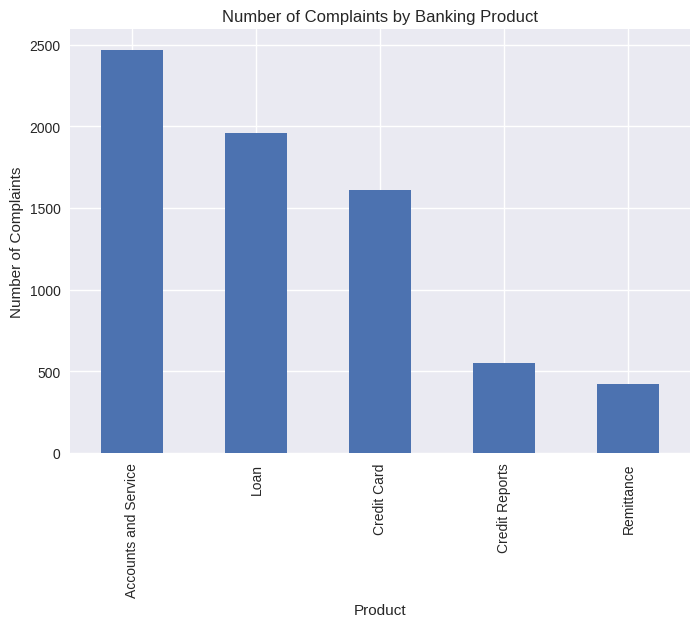

Department
Accounts and Service    2471
Loan                    1959
Credit Card             1609
Credit Reports           550
Remittance               422
Name: count, dtype: int64


In [12]:
df['Department'].value_counts().plot(kind='bar')
plt.title('Number of Complaints by Banking Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.show()
print(df['Department'].value_counts())


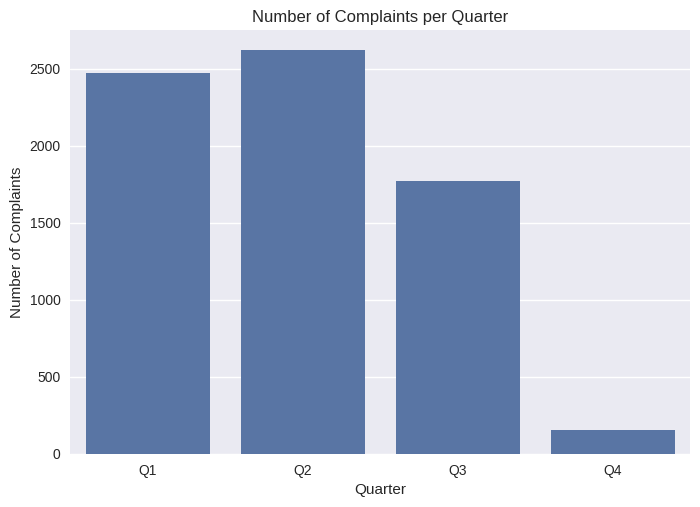

Quarter
Q1    2470
Q2    2618
Q3    1771
Q4     152
Name: count, dtype: int64


In [13]:
sns.countplot(x='Quarter', data=df)
plt.title('Number of Complaints per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Complaints')
plt.show()
print(df['Quarter'].value_counts(sort=False))

### Observations
- Most complaints were in the first half of the year. However Q4 data is likely limited, due to last date of complaint was 10/21/23
- Most complaints were for the Accounts & Services department with 2471 filed complaints

In [14]:
df.sample(10)

,Complaint ID,Date Received,Banking Product,Issue ID,Complaint Description,State,ZIP,Bank Response,Department,Quarter
3534,CID94215460,2023-08-21,"Credit reporting, credit repair services, or o...",I_8801555,In accordance with the fair credit reporting a...,Ohio,43953,Closed with explanation,Accounts and Service,Q3
184,CID69126668,2023-01-14,Credit card or prepaid card,I_9017186,In XX/XX/XXXX my Bank of ABC State of Michigan...,Michigan,48239,Closed with monetary relief,Credit Card,Q1
1673,CID60402777,2023-04-27,Checking or savings account,I_3648593,"Since XX/XX/XXXX and XX/XX/XXXX, I have disput...",South Carolina,29611,Closed with monetary relief,Accounts and Service,Q2
591,CID70745861,2023-02-14,Credit card or prepaid card,I_5233037,None of your choices applied to this. \nWhen I...,New York,14519,Closed with explanation,Credit Card,Q1
2608,CID77969096,2023-07-06,Mortgage,I_9057781,I have applied for a HELOC through bank of ABC...,California,94530,Closed with explanation,Loan,Q3
2033,CID63721445,2023-05-25,Checking or savings account,I_3648593,Deposited a check XX/XX/XX23 into our XXXX ac...,Virginia,23112,Closed with monetary relief,Accounts and Service,Q2
4868,CID80450122,2023-02-04,Debt collection,I_3714444,"Credit Solutions Corp. a collection agency, pu...",California,945XX,Closed with non-monetary relief,Loan,Q1
6087,CID34757622,2023-04-28,Money transfers,I_1509084,My wife used to send money to XXXX. she died X...,Maryland,207XX,Closed with explanation,Remittance,Q2
6777,CID34456425,2023-06-18,Student loan,I_8147973,Started off with a federal loan through Sallie...,Louisiana,703XX,Closed with explanation,Loan,Q2
5770,CID46162607,2023-04-08,Debt collection,I_5455278,called with voicemail saying they would contac...,Texas,750XX,Closed,Loan,Q2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Complaint ID           7011 non-null   object        
 1   Date Received          7011 non-null   datetime64[ns]
 2   Banking Product        7011 non-null   object        
 3   Issue ID               7011 non-null   object        
 4   Complaint Description  7011 non-null   object        
 5   State                  7011 non-null   object        
 6   ZIP                    7011 non-null   object        
 7   Bank Response          7011 non-null   object        
 8   Department             7011 non-null   object        
 9   Quarter                7011 non-null   category      
dtypes: category(1), datetime64[ns](1), object(8)
memory usage: 500.1+ KB


## Define a function named preprocessing that executes the following series of pre-processing steps in order:
Convert text to lowercase

Remove numbers

Remove stopwords

Remove punctuation

Apply lemmatization

Clean the text under ‘Complaint Description’ using the above function


In [16]:
def preprocessing(text):
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [17]:
df['tokenized_text'] = df['Complaint Description'].apply(preprocessing)

## Convert the pre-processed text into a matrix of TF-IDF features for downstream modelling.


In [18]:
Tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
Tfidf_matrix = Tfidf.fit_transform(df['tokenized_text'])

## In order to effectively manage the process, it is critically important to categorise the complaint and pass on to the concerned product department. Consider the department as a target variable and build a classification model.


In [19]:
X = Tfidf_matrix
y = df['Department']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))

                      precision    recall  f1-score   support

Accounts and Service       0.74      0.80      0.76       523
         Credit Card       0.76      0.71      0.74       305
      Credit Reports       0.76      0.66      0.71        93
                Loan       0.83      0.89      0.86       400
          Remittance       0.67      0.34      0.45        82

            accuracy                           0.77      1403
           macro avg       0.75      0.68      0.70      1403
        weighted avg       0.77      0.77      0.76      1403



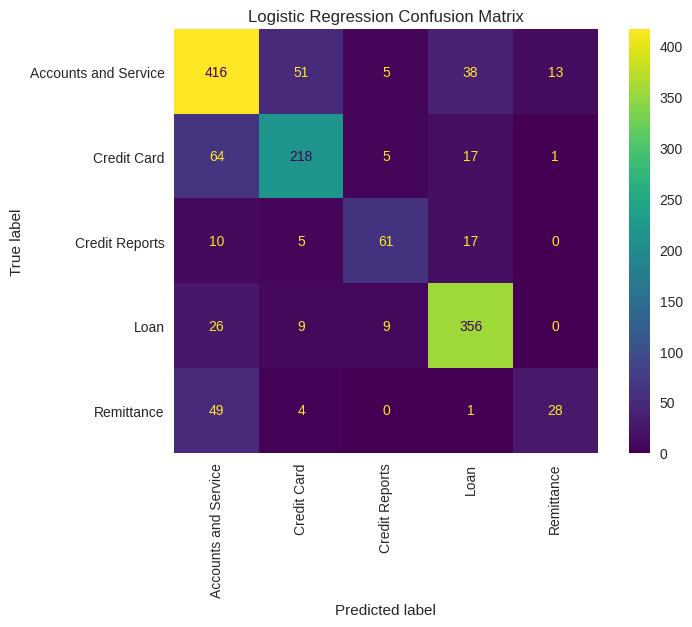

In [23]:
cm = confusion_matrix(y_test, y_pred_log, labels=log_model.classes_)
log_confu = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
log_confu.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

#### Observations
- Logististic regression model has a 77% accuracy overall
- Recall for "Credit reports" and "Remittance" were low, scoreing 66% and 35% respectively, likely due to imbalance of data compared to the other classes. 

## Use any transformer-based model to do the same task(as above)


In [24]:
Distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
DistilBert_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(df['Department'].unique()))
# Bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['Banking Product'].unique()))

2025-05-17 12:11:04.904717: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceCla

In [25]:
X = df['tokenized_text']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Department'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
train_encodings = Distilbert_tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = Distilbert_tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors='tf')

In [27]:
DistilBert_model.compile(optimizer='adam',
                   loss=SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

DistilBert_history = DistilBert_model.fit(train_encodings['input_ids'], y_train, epochs=5, batch_size=128,validation_split=0.2)

Epoch 1/5
36/36 [==============================] - 298s 8s/step - loss: 1.5165 - accuracy: 0.3119 - val_loss: 1.4546 - val_accuracy: 0.3298
Epoch 2/5
36/36 [==============================] - 294s 8s/step - loss: 1.4641 - accuracy: 0.3065 - val_loss: 1.4584 - val_accuracy: 0.3298
Epoch 3/5
36/36 [==============================] - 294s 8s/step - loss: 1.4509 - accuracy: 0.3431 - val_loss: 1.4322 - val_accuracy: 0.3298
Epoch 4/5
36/36 [==============================] - 294s 8s/step - loss: 1.4455 - accuracy: 0.3538 - val_loss: 1.4352 - val_accuracy: 0.3298
Epoch 5/5
36/36 [==============================] - 293s 8s/step - loss: 1.4465 - accuracy: 0.3462 - val_loss: 1.4386 - val_accuracy: 0.3298


In [28]:
DistilBert_pred = DistilBert_model.predict(test_encodings['input_ids'])
DistilBert_pred = np.argmax(DistilBert_pred.logits, axis=1)  

44/44 [==============================] - 28s 616ms/step


In [29]:
print(classification_report(y_test, DistilBert_pred, target_names=label_encoder.classes_))

                      precision    recall  f1-score   support

Accounts and Service       0.37      1.00      0.54       523
         Credit Card       0.00      0.00      0.00       305
      Credit Reports       0.00      0.00      0.00        93
                Loan       0.00      0.00      0.00       400
          Remittance       0.00      0.00      0.00        82

            accuracy                           0.37      1403
           macro avg       0.07      0.20      0.11      1403
        weighted avg       0.14      0.37      0.20      1403



/var/data/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


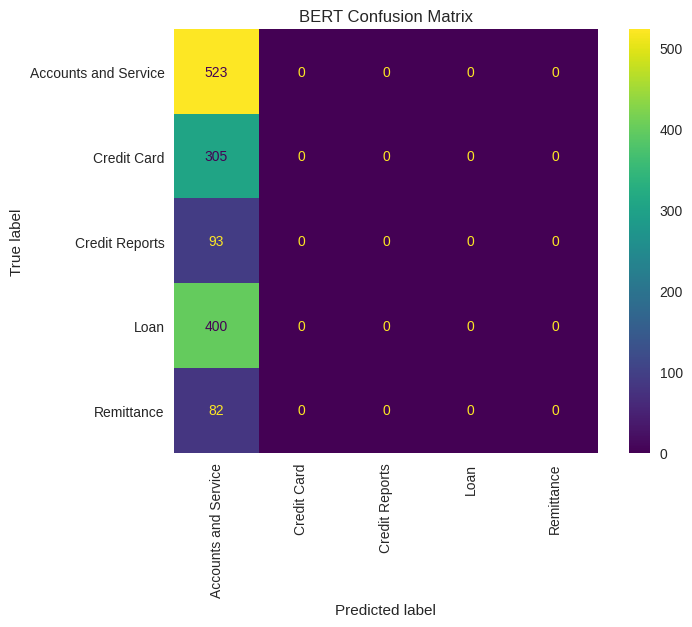

In [30]:
bert_cm = confusion_matrix(y_test, DistilBert_pred)
bert_confu = ConfusionMatrixDisplay(confusion_matrix=bert_cm, display_labels=label_encoder.classes_)
bert_confu.plot()
plt.title('BERT Confusion Matrix')
plt.grid(False)
plt.xticks(rotation=90)
plt.show()


#### Observations
- The DistilBert transformer model has ~34% accuracy on the training data
- The transformer model appears to be predicting all of the complaints as Accounts and Services, likely due to that department having the most data points. 
- The transformer model is likely getting skewed by the noise in the data and with the whole dataset being relatively small.

### Use SentimentIntensityAnalyzer to predict sentiments from the complaints. 
The SentimentIntensityAnalyzer is a class from the vader 

Sentiment library designed for sentiment analysis. It evaluates text to determine the sentiment scores across four categories: positive, negative, neutral, and compound. The compound score is a normalized value between -1 (most extreme negative) and +1 (most extreme positive), providing an overall sentiment rating.

This analyzer is particularly effective for social media and other informal texts, as it can interpret emoticons, acronyms, and slang. It is widely used for tasks like sentiment classification, opinion mining, and customer feedback analysis. Its ease of use and accuracy make it a valuable tool in NLP.

In [31]:
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_scores = []
for text in df['Complaint Description']:
    sentiment = sentiment_analyzer.polarity_scores(text)
    sentiment_scores.append(sentiment['compound'])
df['Sentiment Score'] = sentiment_scores
df['Sentiment Score']

0      -0.9488
1      -0.1207
2      -0.5267
3      -0.8796
4       0.9357
         ...  
7006    0.8782
7007   -0.9327
7008   -0.1359
7009    0.2732
7010   -0.2263
Name: Sentiment Score, Length: 7011, dtype: float64

How can the score be used by the bank? Share your insights.

In [32]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = df['Complaint Description'].apply(lambda x: analyzer.polarity_scores(x))

df['Negative'] = sentiment_scores.apply(lambda x: x['neg'])
df['Neutral'] = sentiment_scores.apply(lambda x: x['neu'])
df['Positive'] = sentiment_scores.apply(lambda x: x['pos'])
df['Compound'] = sentiment_scores.apply(lambda x: x['compound'])

# Categorize sentiment based on compound score
df['Sentiment'] = df['Compound'].apply(lambda x: 'Positive' if x >= 0.25 else ('Negative' if x <= -0.25 else 'Neutral'))


In [33]:
print("\nSentiment Analysis Results (Sample):")
print(df[['Complaint Description', 'Negative', 'Neutral', 'Positive', 'Compound', 'Sentiment']].head())



Sentiment Analysis Results (Sample):
                               Complaint Description  Negative  Neutral  \
0  on XX/XX/XX22 I opened a safe balance account ...     0.081    0.893   
1  There is an item from Bank of ABC on my credit...     0.095    0.817   
2  On XX/XX/XX22 I found out that my account was ...     0.050    0.950   
3  I've had a credit card for years with Bank of ...     0.089    0.848   
4  This issue has to do with the way that Bank of...     0.053    0.850   

   Positive  Compound Sentiment  
0     0.026   -0.9488  Negative  
1     0.089   -0.1207   Neutral  
2     0.000   -0.5267  Negative  
3     0.064   -0.8796  Negative  
4     0.097    0.9357  Positive  


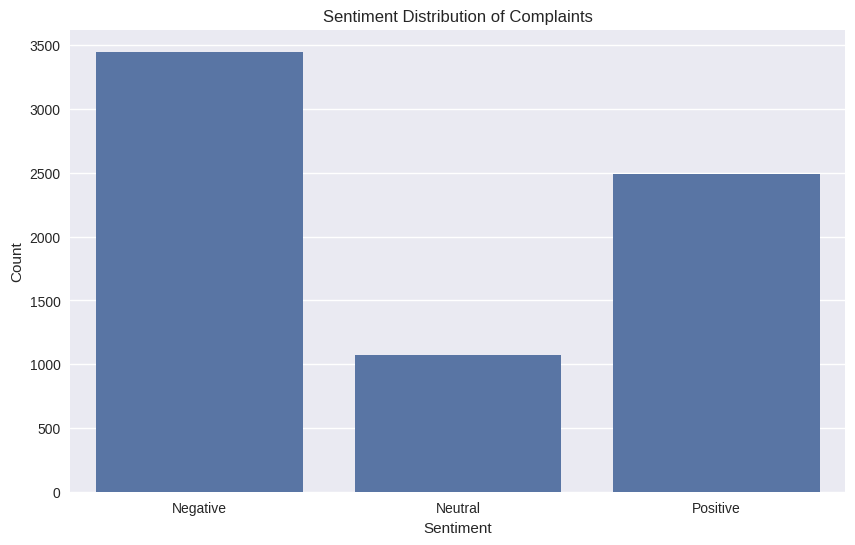

In [34]:
# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution of Complaints')
plt.xlabel('Sentiment')     
plt.ylabel('Count')
plt.show()

In [35]:
df['Sentiment'].value_counts()

Sentiment
Negative    3450
Positive    2488
Neutral     1073
Name: count, dtype: int64

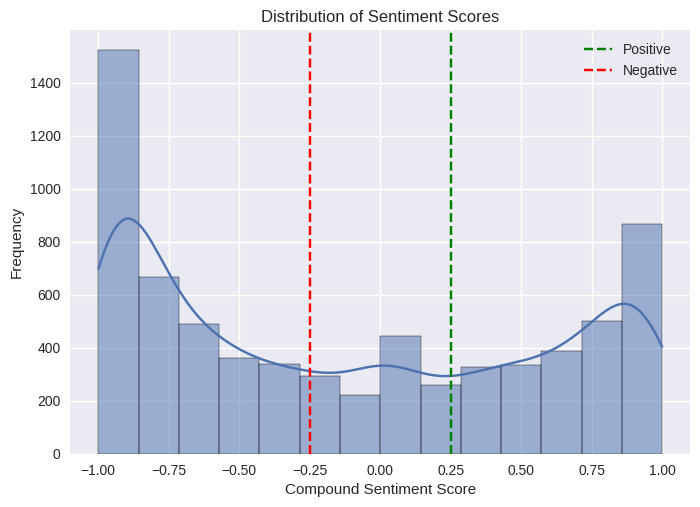

In [36]:
sns.histplot(df['Compound'], bins='auto', kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0.25, color='green', linestyle='--', label='Positive')
plt.axvline(x=-0.25, color='red', linestyle='--', label='Negative')
plt.legend()
plt.show()

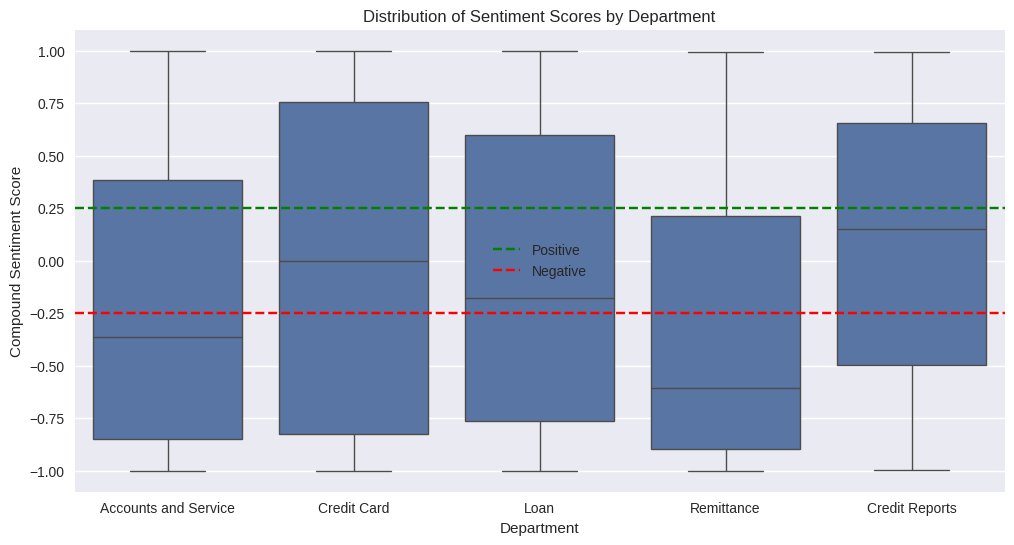

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Compound', data=df)
plt.title('Distribution of Sentiment Scores by Department')
plt.xlabel('Department')
plt.ylabel('Compound Sentiment Score')
plt.axhline(y=0.25, color='green', linestyle='--', label='Positive')
plt.axhline(y=-0.25, color='red', linestyle='--', label='Negative')
plt.legend()
plt.show()

#### Observations
- Deparments "Accounts and Services" and "Remittance" have medians lower than negative threshold
    - Majority of data within these departments have negative sentiments
- Deparment "Credit" has a median at 0 within neutral sentiment region
- Deparment "Credit Reports" has a median higher than 0 within neutral sentiment region


In [38]:
negative_sentiment = df[df['Sentiment Score'] <= -0.25]
positive_sentiment = df[df['Sentiment Score'] >= 0.25]
neutral_sentiment = df[(df['Sentiment Score'] < 0.25) & (df['Sentiment Score'] > -0.25)]

In [39]:
top_10_negative = negative_sentiment[['Complaint ID','Quarter', 'Department','Complaint Description','Sentiment Score']].sort_values(by='Sentiment Score', ascending=True).head(10)
top_10_negative

,Complaint ID,Quarter,Department,Complaint Description,Sentiment Score
2261,CID54622593,Q2,Loan,Subject of the complaint : A notice dated XX/X...,-0.9996
2705,CID99340928,Q3,Accounts and Service,I received a letter by XXXX on XX/XX/XXXX that...,-0.9992
3351,CID91822439,Q3,Accounts and Service,The case is about Bank of ABC 1 ) internationa...,-0.9992
1558,CID62539350,Q2,Accounts and Service,"In XX/XX/XXXX, I was the victim of fraud commi...",-0.9991
532,CID90717238,Q1,Credit Card,"On XX/XX/XXXX my husband, XXXX, responded to a...",-0.9991
1465,CID52372436,Q2,Credit Card,In XX/XX/XXXX I was the victim of a phishing a...,-0.9991
1296,CID60801084,Q2,Remittance,I was robbed via XXXX and Bank of ABC itself f...,-0.9991
4080,CID52029991,Q3,Remittance,Elder financial Abuse My name is XXXX XXXX XXX...,-0.9990
2708,CID74675595,Q3,Remittance,We received your complaint. Thank you. \n\nWe ...,-0.9990
6783,CID74877429,Q2,Loan,I had recently agreed with XXXX to a payment d...,-0.9988


In [40]:
top_10_positive = positive_sentiment[['Complaint ID','Quarter', 'Department','Complaint Description', 'Sentiment Score']].sort_values(by='Sentiment Score', ascending=False).head(10)
top_10_positive

,Complaint ID,Quarter,Department,Complaint Description,Sentiment Score
3727,CID51494054,Q3,Accounts and Service,I did not sign for all inquiries and did not a...,0.9994
1785,CID81469442,Q2,Loan,"To Whom It May Concern, This letter is a forma...",0.9993
4589,CID32923214,Q1,Loan,"On or about XXXX XXXX, XXXX, I received a tele...",0.9985
3685,CID99016084,Q3,Loan,"Fact, I am a federally protected consumer, hol...",0.9984
6505,CID79883711,Q2,Credit Card,I lost XXXX Reward Points on my Us Bank XXXX c...,0.9983
5023,CID93309869,Q1,Accounts and Service,"Bank of America 's response is INVALID, IRRELE...",0.9980
6603,CID91272739,Q2,Loan,I would like to start off by first saying that...,0.9980
2588,CID62532074,Q3,Credit Card,I APPLIED FOR MY 2ND BANK OF ABC CREDIT CARD I...,0.9977
3525,CID50019889,Q3,Credit Card,"Hello, This complaint is about my Bank of ABC ...",0.9977
5254,CID16805961,Q1,Credit Card,"To Whom It May Concern, My name is XXXX XXXX. ...",0.9977


In [41]:
top_Q1_negative = negative_sentiment[negative_sentiment['Quarter'] == 'Q1']
top_Q1_negative = top_Q1_negative[['Complaint ID','Department','Complaint Description','Sentiment Score']].sort_values(by='Sentiment Score', ascending=True).head(10)
top_Q1_negative

,Complaint ID,Department,Complaint Description,Sentiment Score
532,CID90717238,Credit Card,"On XX/XX/XXXX my husband, XXXX, responded to a...",-0.9991
1007,CID51504232,Accounts and Service,I went to the ATM and made two deposits on XX/...,-0.9987
1228,CID90607864,Accounts and Service,I had previously filed a complain ( XXXX ) on ...,-0.9984
714,CID60812449,Credit Card,B of A Fraud Claim - {$5000.00} I am once agai...,-0.9984
472,CID81039294,Accounts and Service,"On XX/XX/XXXX, I Received a check from work an...",-0.9980
811,CID69315725,Accounts and Service,On XX/XX/XX22 I was at the XXXX XXXX XXXX in X...,-0.9979
816,CID66922643,Credit Card,I received unemployment insurance compensation...,-0.9976
605,CID95206780,Loan,"What these Banks do will shut a person 's, Bus...",-0.9976
489,CID56132783,Remittance,"On XX/XX/XXXX, I entered into an investment co...",-0.9975
1143,CID50082455,Credit Card,"In XXXX, I noticed {$3600.00} worth of fraud c...",-0.9974


#### Observations
- Majority of complaints had negative sentiments with 3450 total, which makes sense considering when complaints are made customers usually displeased
- Second highest were positive sentiments with 2888 total, followed by neutral sentiment of 1073, which makes sense considering the threshold set at +/- 0.25
- Within the negative sentiment scores, majority of the negative reviews are within the 1st bin nearest to -1 value


# Conclusions/Insights
- Using a transformer model with this smaller dataset may not be the most optimal for text classification but may have more promising results using simplar models like logistic regression
    - With further hyperparameter tuning, accuracy could also improve in categorizing complaints by department.
- However, VaderSentiment analyzer can be used to organize the complaints based on sentiment
- By viewing the top negative sentiment complaints, the bank can prioritize fixing these issues first to appease the more displeased customers
    - By analyzing sentiment scores, staff can also properly respond to the complaint with appropriate empathy and tone
- Issues could also be addressed, prioritizing the higher volume times of year as well, revealing trends in customer satisfaction
    - One strategy could be ensuring proper staffing support during Q1 or pre-emptively in the previous year Q4 
- By viewing the sentiment scores by department, the bank can also investigate more in-depth likely "problem spots" between and within department workflow or a customers' perpective experience